In [2]:
import pandas as pd
import numpy as np
from glob import glob

import matplotlib.pyplot as plt
from matplotlib import gridspec, lines
import seaborn as sns

# Read data

In [4]:
data_dir = './performances/'
files = glob('*.txt', root_dir=data_dir)

data = pd.DataFrame()
for file in files:
    data_tmp = np.loadtxt(data_dir + file)
    data[file.split('.')[0] + '_matmul1'] = data_tmp[0,:]
    data[file.split('.')[0] + '_matmul2'] = data_tmp[1,:]
    data[file.split('.')[0] + '_matmuldef'] = data_tmp[2,:]
data=data*1000
data

/tmp/ipykernel_2718/2981654344.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[file.split('.')[0] + '_matmul2'] = data_tmp[1,:]
/tmp/ipykernel_2718/2981654344.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[file.split('.')[0] + '_matmuldef'] = data_tmp[2,:]
/tmp/ipykernel_2718/2981654344.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

,100200_2001000_perf_matmul1,100200_2001000_perf_matmul2,100200_2001000_perf_matmuldef,11_110_perfO1_matmul1,11_110_perfO1_matmul2,11_110_perfO1_matmuldef,1001000_1000100_perf_matmul1,1001000_1000100_perf_matmul2,1001000_1000100_perf_matmuldef,1001000_1000100_perfO_matmul1,...,1010_1010_perfOfast_matmuldef,1020_2050_perf_matmul1,1020_2050_perf_matmul2,1020_2050_perf_matmuldef,11_110_perf_matmul1,11_110_perf_matmul2,11_110_perf_matmuldef,11_110_perfO_matmul1,11_110_perfO_matmul2,11_110_perfO_matmuldef
0,67.743003,64.869009,4.620001,0.002000,0.001,0.000000,25.149999,25.489001,2.791002,10.604000,...,0.002,0.070000,0.046000,0.029000,0.002000,0.001,0.002000,0.001000,0.001000,0.001000
1,65.318003,65.228015,3.654003,0.001000,0.000,0.001000,24.779003,26.120000,2.855003,10.433001,...,0.002,0.045000,0.045000,0.013000,0.001000,0.002,0.001000,0.001000,0.001000,0.001000
2,67.282021,65.595985,3.733993,0.000000,0.001,0.000000,25.415994,25.248990,2.670005,10.505002,...,0.002,0.044000,0.043000,0.005000,0.001000,0.002,0.001000,0.001000,0.001000,0.001000
3,66.746026,64.846009,3.304005,0.001000,0.001,0.001000,25.068000,25.215998,2.671003,10.590002,...,0.001,0.044000,0.043000,0.005000,0.001000,0.001,0.001000,0.001000,0.001000,0.001000
4,67.310035,65.108001,3.318012,0.001000,0.000,0.001000,24.928003,26.056007,2.669007,10.313995,...,0.002,0.043000,0.055000,0.005000,0.002000,0.001,0.002000,0.001000,0.001000,0.001000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,63.873291,62.530518,3.173828,0.000999,0.001,0.001000,25.199890,25.619507,2.716064,10.303497,...,0.001,0.057995,0.055999,0.005990,0.001000,0.001,0.000999,0.000999,0.000000,0.001000
996,64.514160,62.301636,3.219604,0.000999,0.001,0.001000,24.959564,25.436401,2.670288,10.643005,...,0.001,0.044003,0.043005,0.007004,0.001000,0.002,0.001000,0.001000,0.000999,0.000000
997,64.727783,62.362671,3.204346,0.000999,0.001,0.001000,24.921417,25.398254,2.674103,10.372162,...,0.001,0.043988,0.043005,0.006005,0.001000,0.001,0.001000,0.000000,0.001000,0.000999
998,64.117432,62.347412,3.112793,0.001000,0.001,0.000999,25.207520,25.417328,2.674103,10.454178,...,0.002,0.069991,0.043988,0.009000,0.000999,0.001,0.001000,0.000999,0.000000,0.001000


# Performances for different implementations

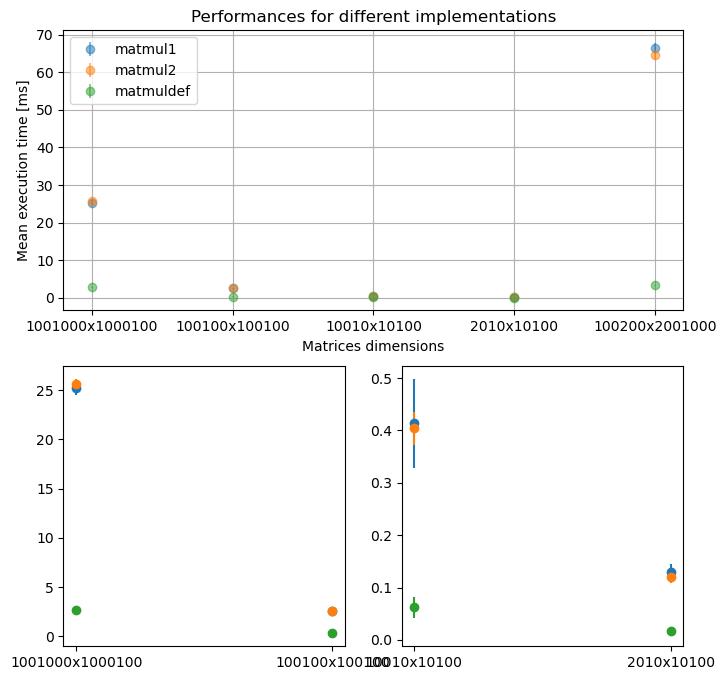

In [5]:
implementations = ['perf_matmul1', 'perf_matmul2', 'perf_matmuldef']
fig = plt.figure(figsize=(8,8))
spec = gridspec.GridSpec(ncols=2, nrows=2)
ax = fig.add_subplot(spec[0:2])
axzoom1, axzoom2 = fig.add_subplot(spec[2]), fig.add_subplot(spec[3])

for implementation in implementations:
    prova = data[data.columns[np.where(np.char.find(list(data.columns.values), implementation)!=-1)]]
    right_indexing = np.concatenate((np.arange(1, 5), [0]))

    ax.errorbar(np.asarray(['x'.join(x.split('_')[0:2]) for x in list(prova.columns.values)])[right_indexing], 
                np.asarray(prova.mean(axis=0))[right_indexing], np.asarray(prova.std(axis=0))[right_indexing], 
                fmt='o', alpha=0.5, label=implementation.split('_')[1])
    
    axzoom1.errorbar(np.asarray(['x'.join(x.split('_')[0:2]) for x in list(prova.columns.values)])[[1, 2]], 
                    np.asarray(prova.mean(axis=0))[[1, 2]], np.asarray(prova.std(axis=0))[[1, 2]], 
                    fmt='o', label=implementation.split('_')[1])
    axzoom2.errorbar(np.asarray(['x'.join(x.split('_')[0:2]) for x in list(prova.columns.values)])[[3, 4]], 
                    np.asarray(prova.mean(axis=0))[[3, 4]], np.asarray(prova.std(axis=0))[[3, 4]], 
                    fmt='o', label=implementation.split('_')[1])


ax.grid()
ax.set_xlabel('Matrices dimensions')
ax.set_ylabel('Mean execution time [ms]')
ax.set_title('Performances for different implementations')
ax.legend()
plt.show()
#fig.savefig('implementations.pdf')

# Performances for  different optimizations

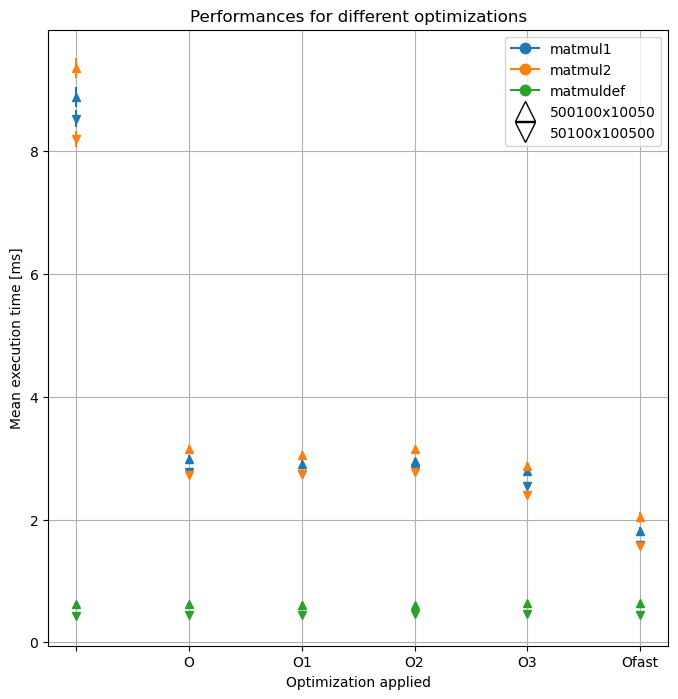

In [48]:

types= ['50100_100500', '500100_10050']
fmt_dict = {'50100_100500': 'v', '500100_10050': '^'}
color_dict = {'perf_matmul1':'tab:blue', 'perf_matmul2': 'tab:orange', 'perf_matmuldef': 'tab:green'}
fig = plt.figure(figsize=(8,8))
spec = gridspec.GridSpec(ncols=1, nrows=1)
ax = fig.add_subplot(spec[0])
#axzoom1, axzoom2 = fig.add_subplot(spec[2]), fig.add_subplot(spec[3])

for type in types:
    for implementation in implementations:
        prova = data[data.columns[np.where((np.char.find(list(data.columns.values), type)!=-1) & (np.char.find(list(data.columns.values), implementation.split('_')[1])!=-1))]]
        right_indexing = np.concatenate((np.arange(1, 5), [0]))

        ax.errorbar(np.asarray([x.split('_')[2][4:] for x in list(prova.columns.values)]), 
                    np.asarray(prova.mean(axis=0)), np.asarray(prova.std(axis=0)), 
                    fmt=fmt_dict[type], color=color_dict[implementation])


blue = lines.Line2D([], [], color='tab:blue', marker='.',
                          markersize=15, label='matmul1')
orange = lines.Line2D([], [], color='tab:orange', marker='.',
                          markersize=15, label='matmul2')
green = lines.Line2D([], [], color='tab:green', marker='.',
                          markersize=15, label='matmuldef')

up = lines.Line2D([], [], color='white', marker='^', markeredgecolor='black',
                          markersize=15, label='500100x10050')
down = lines.Line2D([], [], color='white', marker='v', markeredgecolor='black',
                          markersize=15, label='50100x100500')
ax.grid()
ax.set_xlabel('Optimization applied')
ax.set_ylabel('Mean execution time [ms]')
ax.set_title('Performances for different optimizations')
ax.legend(handles=[blue, orange, green, up, down])
plt.show()
fig.savefig('optimizations.pdf')

# Performances for different optimizations with increasing size
## Read data

In [6]:
files = glob('1*_1*', root_dir=data_dir)
data = pd.DataFrame()
for file in files:
    data_tmp = np.loadtxt(data_dir + file)
    data[file.split('.')[0] + '_matmul1'] = data_tmp[0,:]
    data[file.split('.')[0] + '_matmul2'] = data_tmp[1,:]
    data[file.split('.')[0] + '_matmuldef'] = data_tmp[2,:]
data=data*1000
data

/tmp/ipykernel_2718/4231459040.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[file.split('.')[0] + '_matmul2'] = data_tmp[1,:]
/tmp/ipykernel_2718/4231459040.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[file.split('.')[0] + '_matmuldef'] = data_tmp[2,:]
/tmp/ipykernel_2718/4231459040.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

,11_110_perfO1_matmul1,11_110_perfO1_matmul2,11_110_perfO1_matmuldef,1001000_1000100_perf_matmul1,1001000_1000100_perf_matmul2,1001000_1000100_perf_matmuldef,1001000_1000100_perfO_matmul1,1001000_1000100_perfO_matmul2,1001000_1000100_perfO_matmuldef,1001000_1000100_perfO1_matmul1,...,1010_1010_perfO3_matmuldef,1010_1010_perfOfast_matmul1,1010_1010_perfOfast_matmul2,1010_1010_perfOfast_matmuldef,11_110_perf_matmul1,11_110_perf_matmul2,11_110_perf_matmuldef,11_110_perfO_matmul1,11_110_perfO_matmul2,11_110_perfO_matmuldef
0,0.002000,0.001,0.000000,25.149999,25.489001,2.791002,10.604000,11.239001,2.862001,10.707000,...,0.002000,0.004000,0.003000,0.002,0.002000,0.001,0.002000,0.001000,0.001000,0.001000
1,0.001000,0.000,0.001000,24.779003,26.120000,2.855003,10.433001,10.340001,2.769999,10.438999,...,0.001000,0.002000,0.002000,0.002,0.001000,0.002,0.001000,0.001000,0.001000,0.001000
2,0.000000,0.001,0.000000,25.415994,25.248990,2.670005,10.505002,10.288998,2.760999,10.506004,...,0.001000,0.002000,0.002000,0.002,0.001000,0.002,0.001000,0.001000,0.001000,0.001000
3,0.001000,0.001,0.001000,25.068000,25.215998,2.671003,10.590002,10.224998,2.709001,10.151997,...,0.001000,0.001000,0.001000,0.001,0.001000,0.001,0.001000,0.001000,0.001000,0.001000
4,0.001000,0.000,0.001000,24.928003,26.056007,2.669007,10.313995,10.264002,2.764001,10.297999,...,0.001000,0.001000,0.002000,0.002,0.002000,0.001,0.002000,0.001000,0.001000,0.001000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000999,0.001,0.001000,25.199890,25.619507,2.716064,10.303497,10.694504,3.036499,10.551453,...,0.001000,0.003001,0.002000,0.001,0.001000,0.001,0.000999,0.000999,0.000000,0.001000
996,0.000999,0.001,0.001000,24.959564,25.436401,2.670288,10.643005,10.305405,2.737045,10.250092,...,0.001000,0.003001,0.001999,0.001,0.001000,0.002,0.001000,0.001000,0.000999,0.000000
997,0.000999,0.001,0.001000,24.921417,25.398254,2.674103,10.372162,10.396957,2.677917,10.324478,...,0.000999,0.003001,0.000998,0.001,0.001000,0.001,0.001000,0.000000,0.001000,0.000999
998,0.001000,0.001,0.000999,25.207520,25.417328,2.674103,10.454178,10.232925,2.712250,10.240555,...,0.001000,0.003001,0.003001,0.002,0.000999,0.001,0.001000,0.000999,0.000000,0.001000


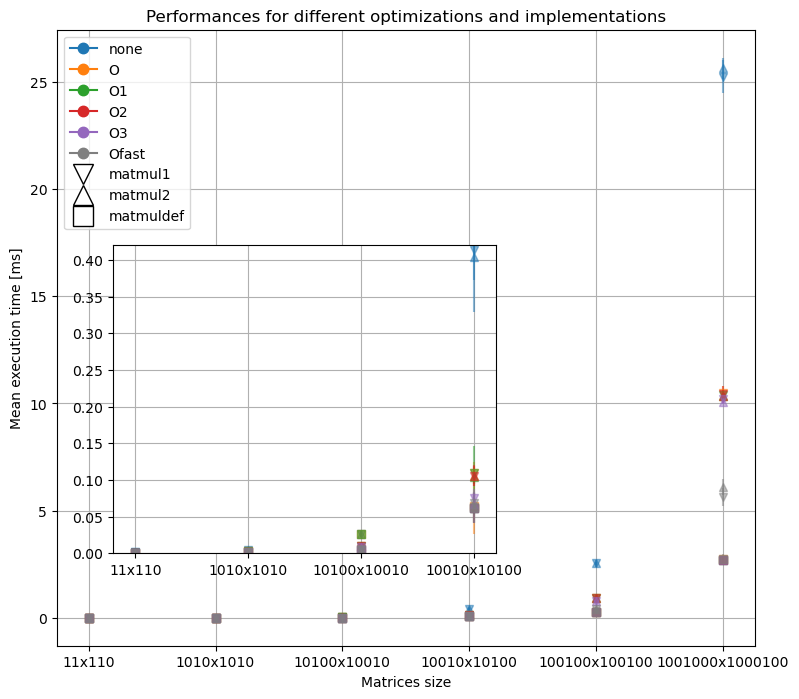

In [72]:
optimizations = ['perf_', 'O_', 'O1', 'O2', 'O3', 'Ofast']
implementations = ['matmul1', 'matmul2', 'matmuldef']
color_dict = {'perf_': 'tab:blue', 'O_': 'tab:orange', 'O1': 'tab:green', 'O2': 'tab:red', 'O3': 'tab:purple', 'Ofast': 'tab:gray'}
fmt_dict = {'matmul1':'v', 'matmul2': '^', 'matmuldef': 's'}
fig = plt.figure(figsize=(9,8))
spec = gridspec.GridSpec(ncols=1, nrows=1)
ax = fig.add_subplot(spec[0])
#axsns = fig.add_subplot(spec[1])
axzoom = ax.inset_axes([0.08, .15, 0.55, .5])
right_indexing = np.arange(5, -1, -1)
right_indexing2 = [3, 5, 4, 2, 1, 0]

for optimization in optimizations:
    for implementation in implementations:
        prova = data[data.columns[np.where((np.char.find(list(data.columns.values), optimization)!=-1) & (np.char.find(list(data.columns.values), implementation)!=-1))]]
        x = np.asarray(['x'.join(x.split('_')[0:2]) for x in list(prova.columns.values)])
        y = np.asarray(prova.mean(axis=0))
        ax.errorbar(x[right_indexing], 
                    y[right_indexing], np.asarray(prova.std(axis=0))[right_indexing], 
                    fmt=fmt_dict[implementation], color=color_dict[optimization], alpha=0.5)

        axzoom.errorbar(np.asarray(['x'.join(x.split('_')[0:2]) for x in list(prova.columns.values)])[right_indexing], 
                    np.asarray(prova.mean(axis=0))[right_indexing], np.asarray(prova.std(axis=0))[right_indexing], 
                    fmt=fmt_dict[implementation], color=color_dict[optimization], alpha=0.5)

        #sns.stripplot(x=x[right_indexing], 
        #              y=y[right_indexing], ax=axzoom, jitter=True,
        #              marker=fmt_dict[implementation], color=color_dict[optimization])
        
        #sns.stripplot(x=np.asarray(['x'.join(x.split('_')[0:2]) for x in list(prova.columns.values)])[right_indexing], 
        #              y=np.asarray(prova.mean(axis=0))[right_indexing], marker=fmt_dict[implementation], color=color_dict[optimization], size=8, jitter=0.3)

colors_lgn = [lines.Line2D([], [], color=color, marker='.', markersize=15, label=label)\
                           for label, color in zip(color_dict.keys(), color_dict.values())]

mrkr_lgn = [lines.Line2D([], [], color='white', marker=marker, markeredgecolor='black', markersize=15, label=label)\
                         for label, marker in zip(fmt_dict.keys(), fmt_dict.values())]

axzoom.set_xlim([-0.2, 3.2])
axzoom.set_ylim([-0., .42])
axzoom.grid()
#axsns.grid(alpha=0.5)
ax.grid()
ax.set_xlabel('Matrices size')
ax.set_ylabel('Mean execution time [ms]')
ax.set_title('Performances for different optimizations and implementations')
ax.legend(handles=colors_lgn + mrkr_lgn, labels=['none', 'O'] + list(color_dict.keys())[2:] + list(fmt_dict.keys()))
#axsns.legend(handles=colors_lgn + mrkr_lgn)
plt.show()
fig.savefig('optimizations_size.pdf')

In [50]:
np.asarray(['x'.join(x.split('_')[0:2]) for x in list(prova.columns.values)])

array(['1001000x1000100', '100100x100100', '10010x10100', '11x110',
       '10100x10010', '1010x1010'], dtype='<U15')

In [51]:
np.asarray(prova.mean(axis=0))

array([2.75656374e+00, 2.78586003e-01, 6.25297816e-02, 7.72000291e-04,
       6.25706930e-03, 1.89200393e-03])

In [55]:
prova = data[data.columns[np.where((np.char.find(list(data.columns.values), '11_110_')!=-1) )]].mean(axis=0)

In [56]:
prova

11_110_perfO1_matmul1         0.000738
11_110_perfO1_matmul2         0.000797
11_110_perfO1_matmuldef       0.000707
11_110_perfO2_matmul1         0.000747
11_110_perfO2_matmul2         0.000765
11_110_perfO2_matmuldef       0.000738
11_110_perfO3_matmul1         0.000755
11_110_perfO3_matmul2         0.000802
11_110_perfO3_matmuldef       0.000849
11_110_perfOfast_matmul1      0.000769
11_110_perfOfast_matmul2      0.000824
11_110_perfOfast_matmuldef    0.000772
11_110_perf_matmul1           0.001304
11_110_perf_matmul2           0.001329
11_110_perf_matmuldef         0.001127
11_110_perfO_matmul1          0.000804
11_110_perfO_matmul2          0.000770
11_110_perfO_matmuldef        0.000729
dtype: float64